In [3]:
import pandas as pd

# Read first few rows of news.tsv
news_df = pd.read_table("/Users/swayamdesai/Downloads/MINDlarge_train/news.tsv", header=None)

# Show shape and head
print("📰 News Data Shape:", news_df.shape)
print("\n📰 Sample News Data:")
print(news_df.head())


# Read first few rows of behaviors.tsv
behaviors_df = pd.read_table("/Users/swayamdesai/Downloads/MINDlarge_train/behaviors.tsv", header=None)

# Show shape and head
print("👤 Behaviors Data Shape:", behaviors_df.shape)
print("\n👤 Sample Behaviors Data:")
print(behaviors_df.head())


📰 News Data Shape: (101527, 8)

📰 Sample News Data:
        0          1                         2  \
0  N88753  lifestyle           lifestyleroyals   
1  N45436       news  newsscienceandtechnology   
2  N23144     health                weightloss   
3  N86255     health                   medical   
4  N93187       news                 newsworld   

                                                   3  \
0  The Brands Queen Elizabeth, Prince Charles, an...   
1    Walmart Slashes Prices on Last-Generation iPads   
2                      50 Worst Habits For Belly Fat   
3  Dispose of unwanted prescription drugs during ...   
4  The Cost of Trump's Aid Freeze in the Trenches...   

                                                   4  \
0  Shop the notebooks, jackets, and more that the...   
1  Apple's new iPad releases bring big deals on l...   
2  These seemingly harmless habits are holding yo...   
3                                                NaN   
4  Lt. Ivan Molchanets peeked 

EDA

In [4]:
news_df.columns = [
    "news_id", "category", "subcategory", "title",
    "abstract", "url", "title_entities", "abstract_entities"
]

behaviors_df.columns = [
    "impression_id", "user_id", "timestamp", "history", "impressions"
]


In [4]:
# See all columns and types
print(behaviors_df.info())
print(behaviors_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232748 entries, 0 to 2232747
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   impression_id  int64 
 1   user_id        object
 2   timestamp      object
 3   history        object
 4   impressions    object
dtypes: int64(1), object(4)
memory usage: 85.2+ MB
None
   impression_id  user_id               timestamp  \
0              1   U87243  11/10/2019 11:30:54 AM   
1              2  U598644   11/12/2019 1:45:29 PM   
2              3  U532401  11/13/2019 11:23:03 AM   
3              4  U593596  11/12/2019 12:24:09 PM   
4              5  U239687   11/14/2019 8:03:01 PM   

                                             history  \
0  N8668 N39081 N65259 N79529 N73408 N43615 N2937...   
1  N56056 N8726 N70353 N67998 N83823 N111108 N107...   
2  N128643 N87446 N122948 N9375 N82348 N129412 N5...   
3  N31043 N39592 N4104 N8223 N114581 N92747 N1207...   
4  N65250 N122359 N71723 N53796 N41663 N4148

In [5]:
print("No of impressions:", behaviors_df['impression_id'].nunique())

print("No of users:", behaviors_df['user_id'].nunique())

# Check for missing values in news_df
print("\nMissing values in news_df:")
print(news_df.isnull().sum())
# Check for missing values in behaviors_df      
print("\nMissing values in behaviors_df:")
print(behaviors_df.isnull().sum())


No of impressions: 2232748
No of users: 711222

Missing values in news_df:
news_id                 0
category                0
subcategory             0
title                   0
abstract             5415
url                     0
title_entities          3
abstract_entities       6
dtype: int64

Missing values in behaviors_df:
impression_id        0
user_id              0
timestamp            0
history          46065
impressions          0
dtype: int64


In [6]:
print(behaviors_df['timestamp'].min())
print(behaviors_df['timestamp'].max())


11/10/2019 10:00:00 AM
11/9/2019 9:59:59 PM


In [7]:
behaviors_df['timestamp'] = pd.to_datetime(behaviors_df['timestamp'])


In [8]:
behaviors_df['history'].isnull().sum()
behaviors_df['history_len'] = behaviors_df['history'].fillna('').apply(lambda x: len(x.split()))
behaviors_df['history_len'].describe()


count    2.232748e+06
mean     3.297724e+01
std      4.087336e+01
min      0.000000e+00
25%      8.000000e+00
50%      1.900000e+01
75%      4.200000e+01
max      8.010000e+02
Name: history_len, dtype: float64

In [9]:
def parse_impression_stats(imp_str):
    items = imp_str.split()
    total = len(items)
    clicks = sum(int(i.split('-')[1]) for i in items)
    return pd.Series([total, clicks])

behaviors_df[['total_impressions', 'clicks']] = behaviors_df['impressions'].apply(parse_impression_stats)
behaviors_df[['total_impressions', 'clicks']].describe()


KeyboardInterrupt: 

In [10]:
# See structure
print(news_df.info())
print(news_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101527 entries, 0 to 101526
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   news_id            101527 non-null  object
 1   category           101527 non-null  object
 2   subcategory        101527 non-null  object
 3   title              101527 non-null  object
 4   abstract           96112 non-null   object
 5   url                101527 non-null  object
 6   title_entities     101524 non-null  object
 7   abstract_entities  101521 non-null  object
dtypes: object(8)
memory usage: 6.2+ MB
None
  news_id   category               subcategory  \
0  N88753  lifestyle           lifestyleroyals   
1  N45436       news  newsscienceandtechnology   
2  N23144     health                weightloss   
3  N86255     health                   medical   
4  N93187       news                 newsworld   

                                               title  \
0  The B

In [ ]:
print("shape:", news_df['news_id'].nunique(), news_df.shape[0])
# Check for missing values in news_df   
print("\nMissing values in news_df:")
print(news_df.isnull().sum())


shape: 101527 101527

Missing values in news_df:
news_id                 0
category                0
subcategory             0
title                   0
abstract             5415
url                     0
title_entities          3
abstract_entities       6
dtype: int64


In [ ]:
news_df['category'].value_counts()
news_df['subcategory'].value_counts()

news_df['title_len'] = news_df['title'].fillna('').apply(lambda x: len(x.split()))
news_df['abstract_len'] = news_df['abstract'].fillna('').apply(lambda x: len(x.split()))

news_df[['title_len', 'abstract_len']].describe()

news_df['title_entities'].apply(lambda x: x != '[]').mean()
news_df['abstract_entities'].apply(lambda x: x != '[]').mean()


np.float64(0.7490322771282516)

/var/folders/z9/3mkdppv93j12cykw28m502s40000gn/T/ipykernel_40091/3438411334.py:16: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/swayamdesai/Desktop/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


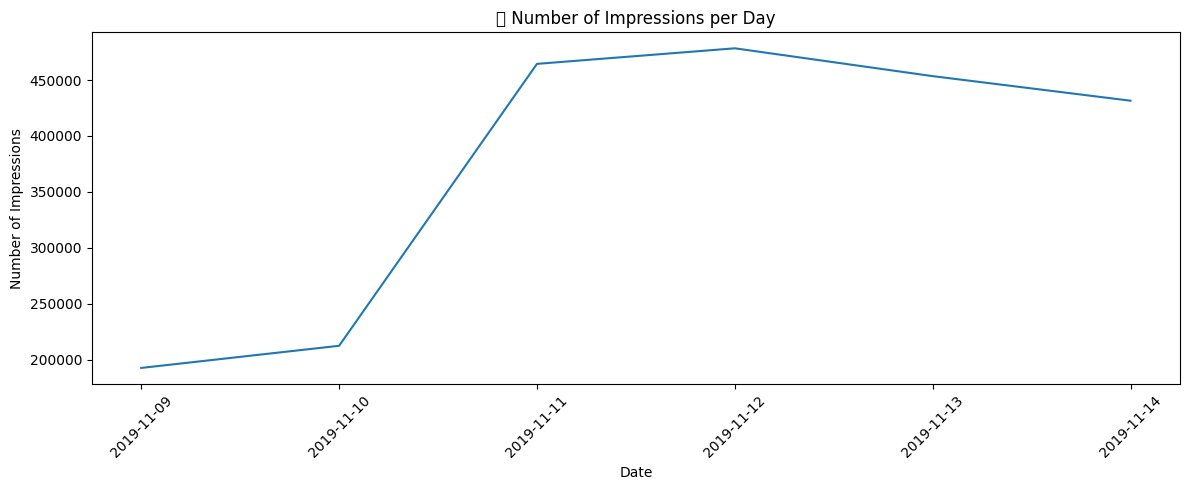

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Group by date only (drop hour info)
behaviors_df['date'] = behaviors_df['timestamp'].dt.date

# Count impressions per day
daily_counts = behaviors_df['date'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(x=daily_counts.index, y=daily_counts.values)
plt.xticks(rotation=45)
plt.title("🗓️ Number of Impressions per Day")
plt.xlabel("Date")
plt.ylabel("Number of Impressions")
plt.tight_layout()
plt.show()


/var/folders/z9/3mkdppv93j12cykw28m502s40000gn/T/ipykernel_40091/2980686604.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=behaviors_df, palette='viridis')
/var/folders/z9/3mkdppv93j12cykw28m502s40000gn/T/ipykernel_40091/2980686604.py:9: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/swayamdesai/Desktop/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


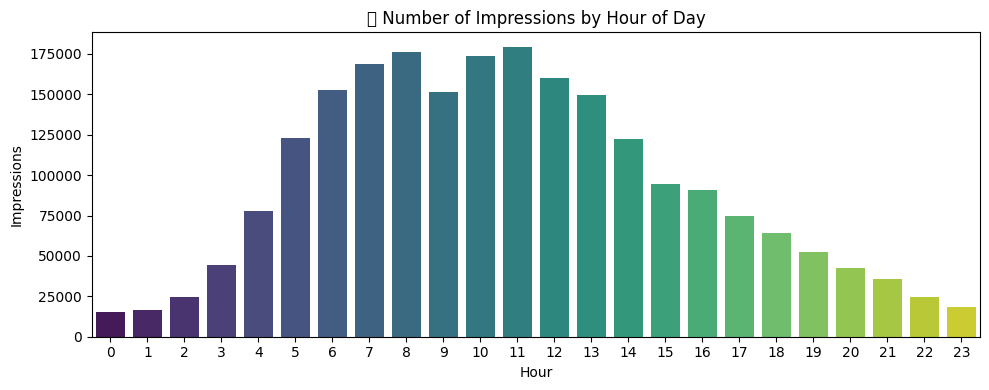

In [14]:
behaviors_df['hour'] = behaviors_df['timestamp'].dt.hour

# Plot histogram of hours
plt.figure(figsize=(10, 4))
sns.countplot(x='hour', data=behaviors_df, palette='viridis')
plt.title("🕒 Number of Impressions by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Impressions")
plt.tight_layout()
plt.show()


/var/folders/z9/3mkdppv93j12cykw28m502s40000gn/T/ipykernel_40091/2924549578.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=behaviors_df[['num_clicks', 'num_noclicks']].sum().reset_index(), x='index', y=0, palette='coolwarm')
/var/folders/z9/3mkdppv93j12cykw28m502s40000gn/T/ipykernel_40091/2924549578.py:15: UserWarning: Glyph 128433 (\N{THREE BUTTON MOUSE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/swayamdesai/Desktop/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128433 (\N{THREE BUTTON MOUSE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


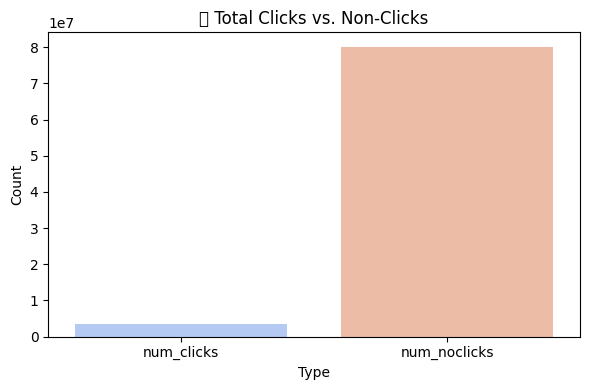

In [15]:
def count_clicks_nonclicks(imp_str):
    items = imp_str.split()
    clicks = sum(1 for i in items if i.endswith('-1'))
    nonclicks = sum(1 for i in items if i.endswith('-0'))
    return pd.Series([clicks, nonclicks])

behaviors_df[['num_clicks', 'num_noclicks']] = behaviors_df['impressions'].apply(count_clicks_nonclicks)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=behaviors_df[['num_clicks', 'num_noclicks']].sum().reset_index(), x='index', y=0, palette='coolwarm')
plt.title("🖱️ Total Clicks vs. Non-Clicks")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


/var/folders/z9/3mkdppv93j12cykw28m502s40000gn/T/ipykernel_40091/3669213594.py:12: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/swayamdesai/Desktop/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


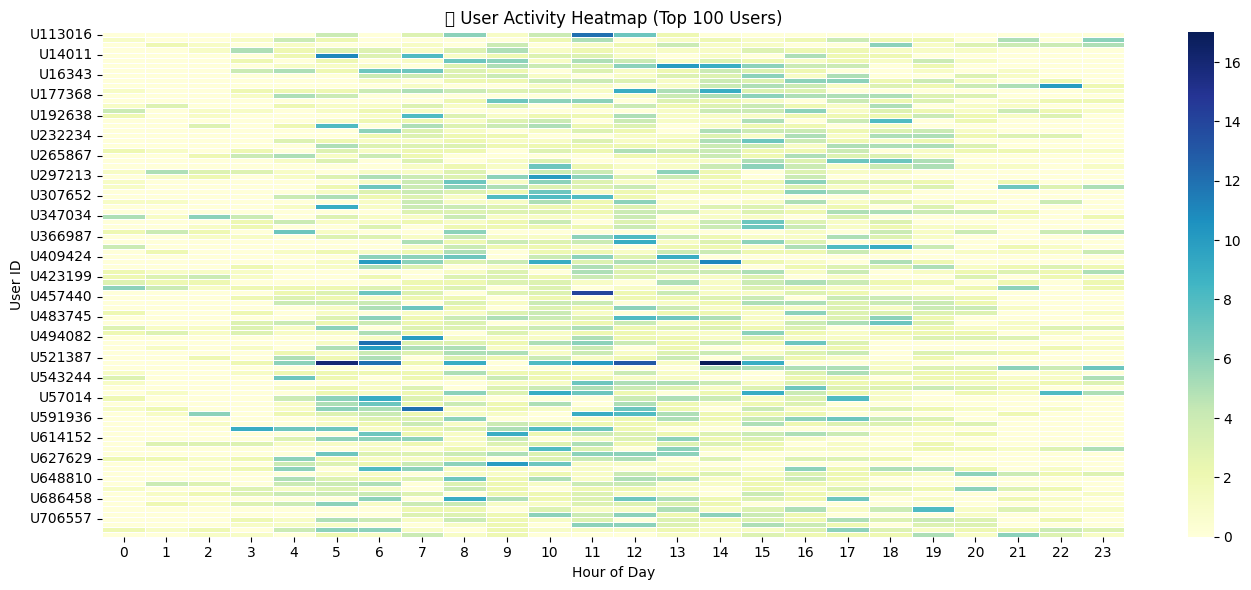

In [16]:
# Take top 100 most active users
top_users = behaviors_df['user_id'].value_counts().head(100).index

subset = behaviors_df[behaviors_df['user_id'].isin(top_users)]
heatmap_df = subset.groupby(['user_id', 'hour']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_df, cmap="YlGnBu", linewidths=0.5)
plt.title("🔥 User Activity Heatmap (Top 100 Users)")
plt.xlabel("Hour of Day")
plt.ylabel("User ID")
plt.tight_layout()
plt.show()


/var/folders/z9/3mkdppv93j12cykw28m502s40000gn/T/ipykernel_40091/1328633473.py:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/swayamdesai/Desktop/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


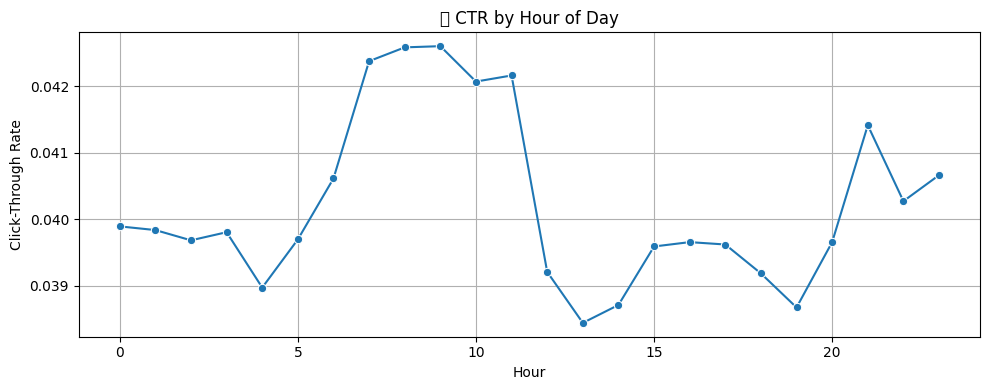

In [17]:
# Total impressions & clicks by hour
hourly = behaviors_df.groupby('hour')[['num_clicks', 'num_noclicks']].sum()
hourly['ctr'] = hourly['num_clicks'] / (hourly['num_clicks'] + hourly['num_noclicks'])

# Plot
plt.figure(figsize=(10, 4))
sns.lineplot(data=hourly, x=hourly.index, y='ctr', marker='o')
plt.title("📊 CTR by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Click-Through Rate")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# === Step 1: Load behaviors.tsv ===
behaviors_df = pd.read_table("/Users/swayamdesai/Downloads/MINDlarge_train/behaviors.tsv", header=None,
    names=["impression_id", "user_id", "timestamp", "history", "impressions"])

# === Step 2: Load news.tsv (your provided path) ===
news_df = pd.read_table("/Users/swayamdesai/Downloads/MINDlarge_train/news.tsv", header=None,
    names=["news_id", "category", "subcategory", "title", "abstract", "url", "title_entities", "abstract_entities"])
news_df = news_df[['news_id', 'category']]

# === Step 3: Explode impressions into rows ===
tqdm.pandas()

exploded_rows = []
for _, row in tqdm(behaviors_df.iterrows(), total=behaviors_df.shape[0]):
    for pair in row['impressions'].split():
        news_id, label = pair.split('-')
        exploded_rows.append({
            'user_id': row['user_id'],
            'news_id': news_id,
            'clicked': int(label)
        })

exploded_df = pd.DataFrame(exploded_rows)

# === Step 4: Merge with news_df to get categories ===
merged_df = exploded_df.merge(news_df, on='news_id', how='left')

# === Step 5: Calculate CTR by category ===
category_ctr = merged_df.groupby('category')['clicked'].agg(['count', 'sum'])
category_ctr['ctr'] = category_ctr['sum'] / category_ctr['count']
category_ctr = category_ctr.sort_values('ctr', ascending=False).reset_index()

# === Step 6: Plot CTR by category ===
plt.figure(figsize=(10, 5))
sns.barplot(data=category_ctr, x='category', y='ctr', palette='crest')
plt.title("📈 CTR by News Category")
plt.ylabel("Click-Through Rate")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 85%|████████▌ | 1904361/2232748 [01:11<00:12, 26778.58it/s]


KeyboardInterrupt: 

100%|██████████| 2232748/2232748 [02:09<00:00, 17197.03it/s]
/var/folders/z9/3mkdppv93j12cykw28m502s40000gn/T/ipykernel_3857/3084923454.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subcat_ctr.head(20), x='ctr', y='subcategory', palette='mako')  # top 20 for readability
/var/folders/z9/3mkdppv93j12cykw28m502s40000gn/T/ipykernel_3857/3084923454.py:44: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/swayamdesai/Desktop/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


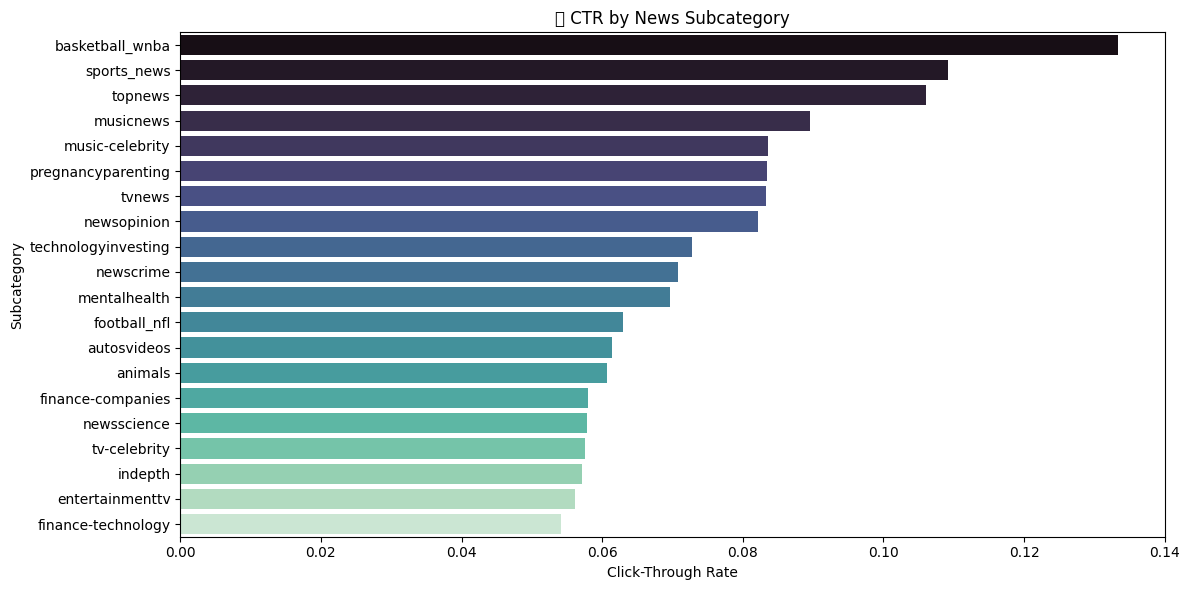

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# === Step 1: Load behaviors.tsv ===
behaviors_df = pd.read_table("/Users/swayamdesai/Downloads/MINDlarge_train/behaviors.tsv", header=None,
    names=["impression_id", "user_id", "timestamp", "history", "impressions"])

# === Step 2: Load news.tsv with subcategories ===
news_df = pd.read_table("/Users/swayamdesai/Downloads/MINDlarge_train/news.tsv", header=None,
    names=["news_id", "category", "subcategory", "title", "abstract", "url", "title_entities", "abstract_entities"])
news_df = news_df[['news_id', 'subcategory']]

# === Step 3: Explode impressions into rows ===
tqdm.pandas()

exploded_rows = []
for _, row in tqdm(behaviors_df.iterrows(), total=behaviors_df.shape[0]):
    for pair in row['impressions'].split():
        news_id, label = pair.split('-')
        exploded_rows.append({
            'user_id': row['user_id'],
            'news_id': news_id,
            'clicked': int(label)
        })

exploded_df = pd.DataFrame(exploded_rows)

# === Step 4: Merge with news_df to get subcategories ===
merged_df = exploded_df.merge(news_df, on='news_id', how='left')

# === Step 5: Calculate CTR by subcategory ===
subcat_ctr = merged_df.groupby('subcategory')['clicked'].agg(['count', 'sum'])
subcat_ctr['ctr'] = subcat_ctr['sum'] / subcat_ctr['count']
subcat_ctr = subcat_ctr.sort_values('ctr', ascending=False).reset_index()

# === Step 6: Plot CTR by subcategory ===
plt.figure(figsize=(12, 6))
sns.barplot(data=subcat_ctr.head(20), x='ctr', y='subcategory', palette='mako')  # top 20 for readability
plt.title("📈 CTR by News Subcategory")
plt.xlabel("Click-Through Rate")
plt.ylabel("Subcategory")
plt.tight_layout()
plt.show()


In [10]:
interactions = []

def parse_impressions(row):
    user = row['user_id']
    for item in row['impressions'].split():
        nid, clicked = item.split('-')
        interactions.append((user, nid, int(clicked)))

behaviors_df.apply(parse_impressions, axis=1)

0          None
1          None
2          None
3          None
4          None
           ... 
2232743    None
2232744    None
2232745    None
2232746    None
2232747    None
Length: 2232748, dtype: object

In [14]:
interactions_df = pd.DataFrame(interactions, columns=['user_id', 'news_id', 'clicked'])

User based collaborative filtering

In [15]:
sampled_df=interactions_df.drop_duplicates(subset=['user_id', 'news_id'], keep='last')
print(f"Sampled Data Shape: {sampled_df.shape}")

top_users = sampled_df['user_id'].value_counts().head(50000).index
sampled_df = sampled_df[sampled_df['user_id'].isin(top_users)]
print(f"Sampled Data Shape: {sampled_df.shape}")

Sampled Data Shape: (71310983, 3)
Sampled Data Shape: (19518089, 3)


In [16]:
user_item_matrix = sampled_df.pivot(index='user_id', columns='news_id', values='clicked').fillna(0)
print(f"User-Item Matrix Shape: {user_item_matrix.shape}")

User-Item Matrix Shape: (50000, 25098)


In [17]:
from sklearn.metrics.pairwise import cosine_similarity

from scipy.sparse import csr_matrix
sparse_matrix = csr_matrix(user_item_matrix.values)

user_similarity = cosine_similarity(sparse_matrix)

In [18]:
import numpy as np

user_index = user_item_matrix.index

def recommend_for_users(user_id, top_n=5):
    if user_id not in user_index:
        print(f"User {user_id} not found.")
        return pd
    
    user_idx = np.where(user_index == user_id)[0][0]

    #get most similar users
    sim_scores=list(enumerate(user_similarity[user_idx]))
    sim_scores= sorted(sim_scores, key=lambda x: x[1], reverse=True)

    #get top similar user
    top_users=[i for i, _ in sim_scores[1: 11]]

    #get average click scores for top similar users
    similar_users_data= user_item_matrix.iloc[top_users]
    mean_scores=similar_users_data.mean(axis=0)

    #filter out articles which the user has alredy clicked on
    user_clicked=user_item_matrix.loc[user_id]
    unseen_scores=mean_scores[user_clicked==0]

    #recmmend top N unseen articles
    top_articles=unseen_scores.sort_values(ascending=False).head(top_n).index.tolist()
    return news_df[news_df['news_id'].isin(top_articles)][['news_id', 'title', 'abstract']]



In [19]:
print(news_df.columns.tolist())


['news_id', 'category', 'subcategory', 'title', 'abstract', 'url', 'title_entities', 'abstract_entities']


In [20]:
test_user = user_item_matrix.index[2]

recommendations = recommend_for_users(test_user, top_n=5)
print(f"Recommendations for User {test_user}:\n")
print(recommendations if not recommendations.empty else "❌ No new articles to recommend.")


Recommendations for User U100038:

        news_id                                              title  \
78291   N104437  This Is The Moment A Senior Shelter Dog Knew H...   
82005    N48015   Abandoned 'unicorn' puppy has a tail on its head   
82686    N20040  NFL Playoff Projection: Raiders have a clear p...   
83017    N41547       This is Chick-fil-A's most-ordered menu item   
100508   N20990  The son of a Chinese billionaire has been bann...   

                                                 abstract  
78291   Finding happiness is no guarantee for pets awa...  
82005    Abandoned 'unicorn' puppy has a tail on its head  
82686                                                 NaN  
83017   There may be a lot of things you don't know ab...  
100508  Wang Sicong, the heir of Chinese real estate m...  


Item Based Collaborative Filtering

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

#Transpose items so that items are rows
item_item_matrix = cosine_similarity(user_item_matrix.T)

item_index= user_item_matrix.columns

/Users/swayamdesai/Desktop/venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/swayamdesai/Desktop/venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/swayamdesai/Desktop/venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [24]:
import numpy as np

def recommend_items_for_users(user_id, top_n=5):
    if user_id not in user_index:
        print(f"User {user_id} not found.")
        return pd
    
    user_row = user_item_matrix.loc[user_id]

    clicked_items = user_row[user_row > 0].index.tolist()

    if not clicked_items:
        print(f"User {user_id} has not clicked on any items.")
        return pd
    
    sim_scores=np.zeros(len(item_item_matrix))
    for item in clicked_items:
        item_idx = np.where(item_index == item)[0][0]
        sim_scores += item_item_matrix[item_idx]

    for item in clicked_items:
        item_idx = np.where(item_index == item)[0][0]
        sim_scores[item_idx] = 0

    top_indices=sim_scores.argsort()[-top_n:][::-1]
    top_news_ids = item_index[top_indices]

    return news_df[news_df['news_id'].isin(top_news_ids)][['news_id', 'title', 'abstract']]


In [23]:
test_user= user_item_matrix.index[2]
recommendations = recommend_items_for_users(test_user, top_n=5)

print(f"Item-based Recommendations for User {test_user}:\n")
print(recommendations if not recommendations.empty else "❌ No new articles to recommend.")

Item-based Recommendations for User U100038:

       news_id                                              title  \
78141   N98178  Charles Rogers, former Michigan State football...   
88664   N30899  College gymnast dies following training accide...   
88666    N7937                    Dean Foods files for bankruptcy   
94618   N47257  Rip Taylor's Cause of Death Revealed, Memorial...   
100814  N32154  Porsche launches into second story of New Jers...   

                                                 abstract  
78141   Charles Rogers, the former Michigan State foot...  
88664   Melanie Coleman, 20, of Milford, was practicin...  
88666   Dean Foods, America's largest milk producer, i...  
94618      The comedian died at the age of 84 last month.  
100814  The Porsche went airborne off a median in Toms...  


Hybrid Recommendation System

In [29]:
user_index=user_item_matrix.index
item_index=user_item_matrix.columns

In [26]:
def hybrid_recommendations(user_id, top_n=5, user_weight=0.5, item_weight=0.5):
    if user_id not in user_index:
        print(f"User {user_id} not found.")
        return pd
    
    #User based scores
    user_idx=np.where(user_index == user_id)[0][0]
    sim_users= list(enumerate(user_similarity[user_idx]))
    sim_users= sorted(sim_users, key=lambda x: x[1], reverse=True)[1:11]

    user_scores = user_item_matrix.iloc[[i for i, _ in sim_users]].mean(axis=0)

    #Item based scores
    user_row=user_item_matrix.loc[user_id]
    clicked_items = user_row[user_row > 0].index.tolist()  

    item_scores=np.zeros(len(item_index))
    for item in clicked_items:
        item_idx=np.where(item_index == item)[0][0]
        item_scores += item_item_matrix[item_idx]

    #remove already clicked items
    for item in clicked_items:
        item_idx=np.where(item_index == item)[0][0]
        item_scores[item_idx] = 0

    item_scores = pd.Series(item_scores, index=item_index)

    #Combine scores
    hybrid_scores = (user_weight * user_scores) + (item_weight * item_scores)
    hybrid_scores = hybrid_scores.sort_values(ascending=False).head(top_n)

    #return recommended articles
    top_news_ids = hybrid_scores.index.tolist()
    return news_df[news_df['news_id'].isin(top_news_ids)][['news_id', 'title', 'abstract']]

In [27]:
test_user= user_item_matrix.index[2]

hybrid_recs=hybrid_recommendations(test_user, top_n=5, user_weight=0.5, item_weight=0.5)

print(f"Hybrid Recommendations for User {test_user}:\n")
print(hybrid_recs if not hybrid_recs.empty else "❌ No new articles to recommend.")

Hybrid Recommendations for User U100038:

       news_id                                              title  \
88664   N30899  College gymnast dies following training accide...   
88666    N7937                    Dean Foods files for bankruptcy   
94618   N47257  Rip Taylor's Cause of Death Revealed, Memorial...   
100508  N20990  The son of a Chinese billionaire has been bann...   
100814  N32154  Porsche launches into second story of New Jers...   

                                                 abstract  
88664   Melanie Coleman, 20, of Milford, was practicin...  
88666   Dean Foods, America's largest milk producer, i...  
94618      The comedian died at the age of 84 last month.  
100508  Wang Sicong, the heir of Chinese real estate m...  
100814  The Porsche went airborne off a median in Toms...  


Deep Learning Recommender

In [17]:
# Step 1: Drop duplicates and reset index
interactions_df = interactions_df.drop_duplicates(subset=['user_id', 'news_id'], keep='last').reset_index(drop=True)

# Step 2: Encode from filtered DataFrame
from sklearn.preprocessing import LabelEncoder

user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

# Sample 2 million rows (adjust as needed)
sample_df = interactions_df.sample(n=2_000_000, random_state=42)

# Encode only this subset
sample_df['user_idx'] = user_encoder.fit_transform(sample_df['user_id'])
sample_df['item_idx'] = item_encoder.fit_transform(sample_df['news_id'])

X_users = sample_df['user_idx'].values.reshape(-1, 1)
X_items = sample_df['item_idx'].values.reshape(-1, 1)
y = sample_df['clicked'].values



In [21]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Embedding, Flatten, Dot, Dense, Concatenate,
    Dropout, BatchNormalization, LeakyReLU
)

n_users = interactions_df['user_id'].nunique()
n_items = interactions_df['news_id'].nunique()
embedding_dim = 64

# Inputs
user_input = Input(shape=(1,), name='user_input')
item_input = Input(shape=(1,), name='item_input')

# Embeddings
user_emb = Embedding(input_dim=n_users + 1, output_dim=embedding_dim, name='user_embedding')(user_input)
item_emb = Embedding(input_dim=n_items + 1, output_dim=embedding_dim, name='item_embedding')(item_input)

# Vectors
user_vec = Flatten()(user_emb)
item_vec = Flatten()(item_emb)

# Dot product path
dot_product = Dot(axes=1)([user_vec, item_vec])

# Dense path (non-linear interactions)
x = Concatenate()([user_vec, item_vec])
x = Dense(128)(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(64)(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# Merge linear and non-linear
merged = Concatenate()([dot_product, x])
output = Dense(1, activation='sigmoid')(merged)

# Compile
model = Model(inputs=[user_input, item_input], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_embedding      │ (None, 1, 64)     │ 45,518,272 │ user_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_embedding      │ (None, 1, 64)     │  1,731,008 │ item_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 64)        │          0 │ user_embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 64)        │          0 │ item_embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 128)       │          0 │ flatten_2[0][0],  │
│ (Concatenate)       │                   │            │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 128)       │     16,512 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu         │ (None, 128)       │          0 │ dense_3[0][0]     │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128)       │        512 │ leaky_re_lu[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │      8,256 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_1       │ (None, 64)        │          0 │ dense_4[0][0]     │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ leaky_re_lu_1[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot (Dot)           │ (None, 1)         │          0 │ flatten_2[0][0],  │
│                     │                   │            │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 65)        │          0 │ dot[0][0],        │
│ (Concatenate)       │                   │            │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │         66 │ concatenate_2[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 47,274,882 (180.34 MB)

 Trainable params: 47,274,498 (180.34 MB)

 Non-trainable params: 384 (1.50 KB)

In [22]:
model.fit(
    [X_users.reshape(-1, 1), X_items.reshape(-1, 1)],
    y,
    epochs=8,
    batch_size=256,
    validation_split=0.1,
    verbose=1
)


Epoch 1/8
7032/7032 ━━━━━━━━━━━━━━━━━━━━ 669s 95ms/step - accuracy: 0.9317 - loss: 0.2203 - val_accuracy: 0.9585 - val_loss: 0.1598
Epoch 2/8
7032/7032 ━━━━━━━━━━━━━━━━━━━━ 672s 96ms/step - accuracy: 0.9586 - loss: 0.1423 - val_accuracy: 0.9577 - val_loss: 0.1671
Epoch 3/8
7032/7032 ━━━━━━━━━━━━━━━━━━━━ 653s 93ms/step - accuracy: 0.9677 - loss: 0.0947 - val_accuracy: 0.9475 - val_loss: 0.2087
Epoch 4/8
7032/7032 ━━━━━━━━━━━━━━━━━━━━ 639s 91ms/step - accuracy: 0.9884 - loss: 0.0345 - val_accuracy: 0.9246 - val_loss: 0.2952
Epoch 5/8
7032/7032 ━━━━━━━━━━━━━━━━━━━━ 692s 98ms/step - accuracy: 0.9994 - loss: 0.0030 - val_accuracy: 0.9167 - val_loss: 0.3822
Epoch 6/8
7032/7032 ━━━━━━━━━━━━━━━━━━━━ 11662s 2s/step - accuracy: 1.0000 - loss: 1.7266e-04 - val_accuracy: 0.9094 - val_loss: 0.4493
Epoch 7/8
7032/7032 ━━━━━━━━━━━━━━━━━━━━ 640s 91ms/step - accuracy: 1.0000 - loss: 1.8315e-05 - val_accuracy: 0.9186 - val_loss: 0.4856
Epoch 8/8
7032/7032 ━━━━━━━━━━━━━━━━━━━━ 689s 98ms/step - accuracy: 

Hyrbrid model with category boosting and time boosting

In [28]:
import pandas as pd
news_df = pd.read_table("/Users/swayamdesai/Downloads/MINDlarge_train/news.tsv", header=None,
    names=["news_id", "category", "subcategory", "title", "abstract", "url", "title_entities", "abstract_entities"])

print(news_df.columns)


Index(['news_id', 'category', 'subcategory', 'title', 'abstract', 'url',
       'title_entities', 'abstract_entities'],
      dtype='object')


In [29]:
from datetime import datetime
current_hour = datetime.now().hour

user_category_pref = sampled_df[sampled_df['clicked'] == 1].merge(
    news_df[['news_id', 'category']], on='news_id'
).groupby('user_id')['category'].agg(lambda x: x.value_counts().idxmax())


In [30]:
def hybrid_recommend(user_id, top_n=5, category_filter=None):
    if user_id not in user_index:
        print("User not found.")
        return pd.DataFrame()

    user_idx = np.where(user_index == user_id)[0][0]
    
    # === USER-BASED CF ===
    sim_scores = list(enumerate(user_similarity[user_idx]))
    top_users = [i for i, _ in sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]]
    user_based_scores = user_item_matrix.iloc[top_users].mean(axis=0)

    # === ITEM-BASED CF ===
    clicked_items = user_item_matrix.loc[user_id]
    clicked_ids = clicked_items[clicked_items > 0].index.tolist()

    item_scores = np.zeros(len(item_item_matrix))
    for item in clicked_ids:
        item_idx = np.where(item_index == item)[0][0]
        item_scores += item_item_matrix[item_idx]

    for item in clicked_ids:
        item_idx = np.where(item_index == item)[0][0]
        item_scores[item_idx] = 0

    item_based_scores = pd.Series(item_scores, index=item_index)

    # === COMBINE HYBRID SCORE ===
    hybrid_scores = (user_based_scores + item_based_scores) / 2

    # === CATEGORY PREFERENCE BOOST ===
    preferred_cat = user_category_pref.get(user_id, None)
    if preferred_cat:
        category_map = news_df.set_index('news_id')['category'].to_dict()
        for nid in hybrid_scores.index:
            if category_map.get(nid) == preferred_cat:
                hybrid_scores[nid] *= 1.2

    # === TIME-OF-DAY FILTERING ===
    current_hour = datetime.now().hour
    recent_behaviors = behaviors_df[pd.to_datetime(behaviors_df['timestamp']).dt.hour == current_hour]
    recent_news_ids = set()
    for row in recent_behaviors['impressions']:
        recent_news_ids.update([pair.split('-')[0] for pair in row.split()])
    hybrid_scores = hybrid_scores[hybrid_scores.index.isin(recent_news_ids)]

    # === FILTER UNSEEN ARTICLES ===
    user_clicked = user_item_matrix.loc[user_id]
    hybrid_scores = hybrid_scores[user_clicked == 0]

    # === Optional: Filter by chosen category ===
    if category_filter:
        category_map = news_df.set_index('news_id')['category'].to_dict()
        hybrid_scores = hybrid_scores[[nid for nid in hybrid_scores.index if category_map.get(nid) == category_filter]]

    # === Recommend Top N ===
    top_articles = hybrid_scores.sort_values(ascending=False).head(top_n).index.tolist()
    return news_df[news_df['news_id'].isin(top_articles)][['news_id', 'title', 'category', 'abstract']]


In [35]:
test_user = user_item_matrix.index[2]
hybrid_recommend(test_user, top_n=5)

,news_id,title,category,abstract
78141,N98178,"Charles Rogers, former Michigan State football...",sports,"Charles Rogers, the former Michigan State foot..."
88748,N62203,Stephen Curry calls out Michael Jordan for bei...,sports,While the opinion of arguably the greatest NBA...
94297,N115443,Kyle Shanahan blasts 49ers WRs over dropped pa...,sports,It's rare to see a coach single out one player...
100508,N20990,The son of a Chinese billionaire has been bann...,news,"Wang Sicong, the heir of Chinese real estate m..."
100814,N32154,Porsche launches into second story of New Jers...,news,The Porsche went airborne off a median in Toms...


In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Dropdown for category
category_options = sorted(news_df['category'].dropna().unique())
category_dropdown = widgets.Dropdown(
    options=[None] + category_options,
    description='Category:',
    value=None
)

# Button to trigger recommendation
run_button = widgets.Button(description="Get Recommendations")

# Display
display(category_dropdown, run_button)

# On-click handler
def on_button_click(b):
    selected_category = category_dropdown.value
    user_id = user_item_matrix.index[0]  # You can also use a text box for this
    result = hybrid_recommend(user_id=user_id, top_n=5, category_filter=selected_category)
    display(result)

run_button.on_click(on_button_click)


Dropdown(description='Category:', options=(None, 'autos', 'entertainment', 'finance', 'foodanddrink', 'games',…

Button(description='Get Recommendations', style=ButtonStyle())

In [ ]:
# Try 50 random users from your user-item matrix
for user_id in user_item_matrix.sample(50).index:
    result = hybrid_recommend(user_id=user_id, top_n=5, category_filter=None)
    if not result.empty:
        print("✅ Try this user:", user_id)
        display(result[['news_id', 'title', 'category']])
        break
else:
    print("❌ No users found with recommendations. Try relaxing filters.")


✅ Try this user: U297646


,news_id,title,category
76297,N47925,Three school workers charged in death of speci...,news
77345,N58641,Car of Marine linked to Virginia slaying is fo...,news
85920,N87684,37 Years After His Wife Is Found Dead with an ...,news
88664,N30899,College gymnast dies following training accide...,news
91502,N106875,"Nurse took in disabled teen, then tortured and...",news


In [31]:
def get_time_slot(hour):
    if 5 <= hour < 11:
        return 'morning'
    elif 11 <= hour < 16:
        return 'midday'
    elif 16 <= hour < 20:
        return 'evening'
    elif 20 <= hour < 24:
        return 'night'
    else:
        return 'late_night'

# Add time slot column to behaviors_df
behaviors_df['hour'] = pd.to_datetime(behaviors_df['timestamp']).dt.hour
behaviors_df['time_slot'] = behaviors_df['hour'].apply(get_time_slot)


In [32]:
# Explode impressions and join with news to get categories
exploded = behaviors_df.copy()
exploded['impression_ids'] = exploded['impressions'].str.split()
exploded = exploded.explode('impression_ids')
exploded['news_id'] = exploded['impression_ids'].str.split('-').str[0]

# Merge with news_df to get categories
news_categories = exploded.merge(news_df[['news_id', 'category']], on='news_id')

# Count top categories per time slot
slot_category_boost = news_categories.groupby(['time_slot', 'category']).size().unstack(fill_value=0)

# Normalize per time slot (optional, for relative boosting)
slot_category_boost = slot_category_boost.div(slot_category_boost.sum(axis=1), axis=0)


: 

In [ ]:
def hybrid_recommend(user_id, top_n=5, category_filter=None):
    if user_id not in user_index:
        print("User not found.")
        return pd.DataFrame()

    user_idx = np.where(user_index == user_id)[0][0]
    
    # === USER-BASED CF ===
    sim_scores = list(enumerate(user_similarity[user_idx]))
    top_users = [i for i, _ in sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]]
    user_based_scores = user_item_matrix.iloc[top_users].mean(axis=0)

    # === ITEM-BASED CF ===
    clicked_items = user_item_matrix.loc[user_id]
    clicked_ids = clicked_items[clicked_items > 0].index.tolist()

    item_scores = np.zeros(len(item_item_matrix))
    for item in clicked_ids:
        item_idx = np.where(item_index == item)[0][0]
        item_scores += item_item_matrix[item_idx]

    for item in clicked_ids:
        item_idx = np.where(item_index == item)[0][0]
        item_scores[item_idx] = 0

    item_based_scores = pd.Series(item_scores, index=item_index)

    # === COMBINE HYBRID SCORE ===
    hybrid_scores = (user_based_scores + item_based_scores) / 2

    # === CATEGORY PREFERENCE BOOST ===
    preferred_cat = user_category_pref.get(user_id, None)
    if preferred_cat:
        category_map = news_df.set_index('news_id')['category'].to_dict()
        for nid in hybrid_scores.index:
            if category_map.get(nid) == preferred_cat:
                hybrid_scores[nid] *= 1.2

    # === TIME SLOT CATEGORY BOOSTING ===
    current_hour = datetime.now().hour
    current_slot = get_time_slot(current_hour)

    if current_slot in slot_category_boost.index:
        slot_weights = slot_category_boost.loc[current_slot].to_dict()
        category_map = news_df.set_index('news_id')['category'].to_dict()

        for nid in hybrid_scores.index:
            cat = category_map.get(nid)
            if cat and slot_weights.get(cat):
                hybrid_scores[nid] *= (1 + slot_weights[cat])  # e.g., boost by +10–50%


    # === FILTER UNSEEN ARTICLES ===
    user_clicked = user_item_matrix.loc[user_id]
    hybrid_scores = hybrid_scores[user_clicked == 0]

    # === Optional: Filter by chosen category ===
    if category_filter:
        category_map = news_df.set_index('news_id')['category'].to_dict()
        hybrid_scores = hybrid_scores[[nid for nid in hybrid_scores.index if category_map.get(nid) == category_filter]]

    # === Recommend Top N ===
    top_articles = hybrid_scores.sort_values(ascending=False).head(top_n).index.tolist()
    return news_df[news_df['news_id'].isin(top_articles)][['news_id', 'title', 'category', 'abstract']]
